In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla V100-SXM2-16GB, 16384 MiB, 16151 MiB


In [2]:
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 48638, done.
remote: Counting objects: 100% (13491/13491), done.
remote: Compressing objects: 100% (1058/1058), done.
remote: Total 48638 (delta 12939), reused 12581 (delta 12361), pack-reused 35147
Receiving objects: 100% (48638/48638), 31.60 MiB | 23.05 MiB/s, done.
Resolving deltas: 100% (36191/36191), done.


In [3]:
%pip install -q -U --pre triton
%pip install -q accelerate transformers torchmetrics datasets ftfy bitsandbytes gradio kaleido cohere openai tiktoken
%pip install --no-deps -q xformers
%pip install git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import torch
from PIL import Image
from datasets import load_dataset
from diffusers import StableDiffusionPipeline


In [5]:
!accelerate config

----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)
0
This machine
----------------------------------------------------------------------------------------------------Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    TPU
0
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:No
Do you wish to optimize your script with torch dynamo?[yes/NO]:No
Do you want to use DeepSpeed? [yes/NO]: No
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0
-----------------------------------------------------------------------------------

In [6]:
#Finetune Code
#Have to use V100/A100, using Tesla T4 will receive error
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
    --input_perturbation 0.1 \
    --pretrained_model_name_or_path "runwayml/stable-diffusion-v1-5" \
    --resolution=512 --center_crop --random_flip \
    --dataset_name 'poloclub/diffusiondb' \
    --dataset_config_name '2m_random_1k' \
    --cache_dir "./cache" \
    --caption_column "prompt" \
    --train_batch_size 1 \
    --max_train_steps 10000 \
    --learning_rate 1e-5 \
    --lr_scheduler="constant" --lr_warmup_steps=0 \
    --use_8bit_adam \
    --output_dir "sd-model-finetuned" \
    --checkpointing_steps 2500 \
    --use_ema

2023-12-18 21:59:00.789232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 21:59:00.789293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 21:59:00.790703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 21:59:01.978200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
12/18/2023 21:59:02 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

scheduler/scheduler_config.json: 100% 308/308 [00:00<00:00, 1.57MB/s]
{'cl

In [ ]:
torch.__version__

'2.1.0+cu121'

In [4]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial
from transformers import CLIPProcessor, CLIPModel
clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")
device = torch.device("cuda:0")
def calculate_clip_score(images, prompts):
    if isinstance(images, np.ndarray):
        images = torch.from_numpy(images)
    clip_score = clip_score_fn((images).permute(0, 3, 1, 2), prompts).detach().cpu()
    return clip_score

In [8]:
#Eval Code
model_ckpt = "runwayml/stable-diffusion-v1-5"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")
sd_pipeline.safety_checker = None
#Fix seed for comparison
seed = 1
generator = torch.manual_seed(seed)
CLIPSCORES = []
for j in range(20):
    prompts = load_dataset("nateraw/parti-prompts", split="train")
    prompts = [prompts[5*j+i]["Prompt"] for i in range(5)]
    images = sd_pipeline(prompts, num_images_per_prompt=1, generator=generator, output_type="np").images
    CLIP_scores = calculate_clip_score(images,prompts)
    CLIPSCORES.append(CLIP_scores)
torch.stack(CLIPSCORES).mean()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

  0%|          | 0/50 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

tensor(23.7626, grad_fn=<MeanBackward0>)

In [11]:
#Eval Code
model_ckpt = "sd-model-finetuned"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")
sd_pipeline.safety_checker = None
#Fix seed for comparison
seed = 1
generator = torch.manual_seed(seed)
CLIPSCORES = []
for j in range(20):
    prompts = load_dataset("nateraw/parti-prompts", split="train")
    prompts = [prompts[5*j+i]["Prompt"] for i in range(5)]
    images = sd_pipeline(prompts, num_images_per_prompt=1, generator=generator, output_type="np").images
    CLIP_scores = calculate_clip_score(images,prompts)
    CLIPSCORES.append(CLIP_scores)
torch.stack(CLIPSCORES).mean()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

tensor(23.6169)

In [4]:
import gc
del images
gc.collect()

1196

In [14]:
!ps aux

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0   1076     8 ?        Ss   Dec18   0:00 /sbin/docker-init -- /datalab/run
root           7  0.2  0.1 925612 69516 ?        Sl   Dec18   0:59 /tools/node/bin/node /datalab/web
root          11  0.0  0.0   7372  3168 ?        S    Dec18   0:12 /bin/bash -e /usr/local/colab/bin
root          13  0.0  0.0   7372  1352 ?        S    Dec18   0:00 /bin/bash -e /datalab/run.sh
root          14  0.1  0.0 1237744 16108 ?       Sl   Dec18   0:42 /usr/colab/bin/kernel_manager_pro
root          36  0.0  0.0   5804   936 ?        Ss   Dec18   0:01 tail -n +0 -F /root/.config/Googl
root          65  0.0  0.0      0     0 ?        Z    Dec18   0:05 [python3] <defunct>
root          66  0.0  0.0  72372 49304 ?        S    Dec18   0:04 python3 /usr/local/bin/colab-file
root         118  0.3  0.2 614864 108752 ?       Sl   Dec18   1:36 /usr/bin/python3 /usr/local/bin/j
root         119  0.1  0.0 1229816 

In [1]:
#CLIP Embeded Finetune Code
#Have to use V100/A100, using Tesla T4 will receive error
!accelerate launch diffusers/examples/text_to_image/clip_embed_train.py \
    --input_perturbation 0.1 \
    --pretrained_model_name_or_path "runwayml/stable-diffusion-v1-5" \
    --clip_guide_scale 0.05 \
    --resolution=512 --center_crop --random_flip \
    --dataset_name 'poloclub/diffusiondb' \
    --dataset_config_name '2m_random_1k' \
    --cache_dir "./cache" \
    --caption_column "prompt" \
    --train_batch_size 1 \
    --max_train_steps 10000 \
    --learning_rate 1e-5 \
    --lr_scheduler="constant" --lr_warmup_steps=0 \
    --use_8bit_adam \
    --output_dir "sd-model-finetuned-clip" \
    --checkpointing_steps 2500 \
    --use_ema

2023-12-19 04:31:11.376370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 04:31:11.376432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 04:31:11.377899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 04:31:12.781479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
12/19/2023 04:31:13 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'thresholding', 'sample_max_value', 'dynamic_thresholding_ratio', 'clip_s

In [5]:
#Eval Code
model_ckpt = "sd-model-finetuned-clip"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")
sd_pipeline.safety_checker = None
#Fix seed for comparison
seed = 1
generator = torch.manual_seed(seed)
CLIPSCORES = []
for j in range(20):
    prompts = load_dataset("nateraw/parti-prompts", split="train")
    prompts = [prompts[5*j+i]["Prompt"] for i in range(5)]
    images = sd_pipeline(prompts, num_images_per_prompt=1, generator=generator, output_type="np").images
    CLIP_scores = calculate_clip_score(images,prompts)
    CLIPSCORES.append(CLIP_scores)
torch.stack(CLIPSCORES).mean()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

tensor(23.4905)

In [6]:
CLIPSCORES

[tensor(24.2417),
 tensor(23.9593),
 tensor(23.4039),
 tensor(23.9181),
 tensor(23.0848),
 tensor(22.9576),
 tensor(23.5488),
 tensor(24.8862),
 tensor(23.9270),
 tensor(23.4290),
 tensor(22.8717),
 tensor(22.7540),
 tensor(22.6042),
 tensor(21.9171),
 tensor(23.4102),
 tensor(22.8607),
 tensor(24.0201),
 tensor(23.9380),
 tensor(24.0372),
 tensor(24.0413)]

In [64]:
model_ckpt = "sd-model-finetuned-clip"#runwayml/stable-diffusion-v1-5,sd-model-finetuned,sd-model-finetuned-clip
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")
sd_pipeline.safety_checker = None
random_num = np.random.randint(0,1500)
prompts = load_dataset("nateraw/parti-prompts", split="train")
prompt = prompts[1407]["Prompt"]
print(prompt)
print(random_num)
image = sd_pipeline(prompt, num_images_per_prompt=1, generator=generator, output_type="np").images
score_0 = calculate_clip_score(image,prompt)
CLIP_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
image_0 = image
score_0

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

an espresso machine that makes coffee from human souls, high-contrast painting
437


  0%|          | 0/50 [00:00<?, ?it/s]

tensor(19.3503)

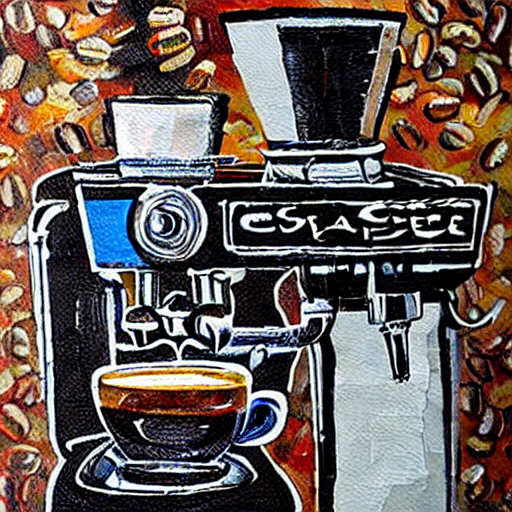

In [65]:
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
img0 = image_0.squeeze()
img0 = Image.fromarray(np.uint8(img0*255),mode="RGB")
img0